<a href="https://colab.research.google.com/github/yohannes4321/Clustering/blob/main/Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [5]:
!pip install plotly


In [6]:
import numpy as np
import pandas as pd
import plotly.express as px




In [8]:
iris = pd.read_csv("/content/drive/MyDrive/Iris.csv") #Load Data
iris.drop('Id',inplace=True,axis=1)

In [9]:
x = iris.iloc[:,:-1].values

y = iris.iloc[:,-1].values


In [10]:
iris.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [11]:
fig = px.pie(iris, 'Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],title='Data Distribution',template='plotly')

fig.show()

The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler




scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


silhouette_scores = []



A loop runs K-Means for values of k ranging from 2 to 10:

For each k, the model assigns data points to k clusters.
The silhouette score is calculated to evaluate clustering performance.
Higher silhouette scores indicate better clustering (more cohesive and well-separated clusters).

In [19]:


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")


For n_clusters = 2, the silhouette score is 0.580
For n_clusters = 3, the silhouette score is 0.459
For n_clusters = 4, the silhouette score is 0.385
For n_clusters = 5, the silhouette score is 0.347
For n_clusters = 6, the silhouette score is 0.341
For n_clusters = 7, the silhouette score is 0.329
For n_clusters = 8, the silhouette score is 0.340
For n_clusters = 9, the silhouette score is 0.343
For n_clusters = 10, the silhouette score is 0.340


The silhouette scores for different k values are plotted to identify the optimal number of clusters.

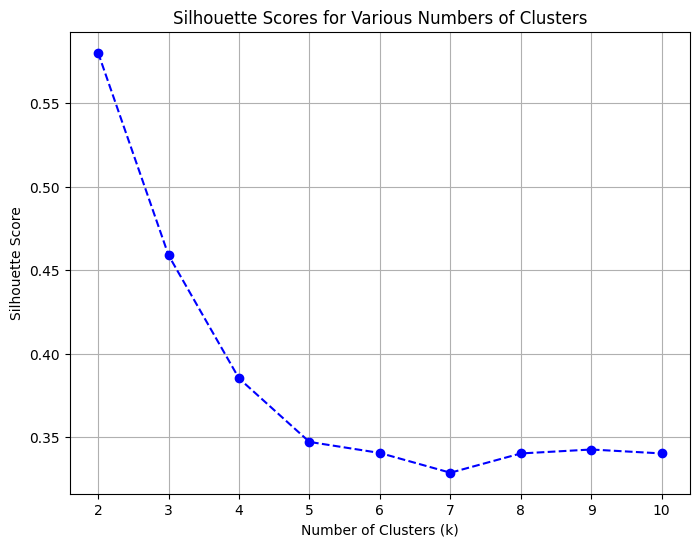

In [20]:


plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

The optimal number of clusters is 2


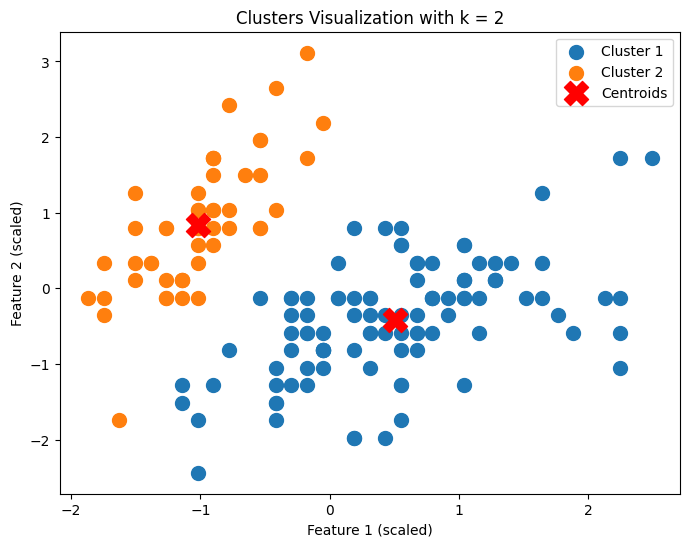

In [21]:


optimal_k = np.argmax(silhouette_scores) + 2
print(f"The optimal number of clusters is {optimal_k}")


final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
final_labels = final_kmeans.fit_predict(x_scaled)


plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(x_scaled[final_labels == i, 0], x_scaled[final_labels == i, 1], s=100, label=f'Cluster {i+1}')


plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'Clusters Visualization with k = {optimal_k}')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()
